In [547]:
from keras.datasets import mnist

import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from PIL import Image
import math
import copy
from scipy.stats import multivariate_normal
from numpy import linalg as la

In [11]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [660]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 8


patches = []

for n in range(100):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [661]:
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=8/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [662]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [321]:
gmm_model = GaussianMixture(n_components=350, random_state=0).fit(patches)
acc = gmm_model.score(patches_val)
print(acc)

-295.96163823041815


In [322]:
gmm_model = GaussianMixture(n_components=50, random_state=0).fit(patches)
acc = gmm_model.score(patches_val)
print(acc)

-5.240919655713112


In [323]:
gmm_model = GaussianMixture(n_components=100, random_state=0).fit(patches)
acc = gmm_model.score(patches_val)
print(acc)

12.204929273790492


In [324]:
gmm_model = GaussianMixture(n_components=150, random_state=0).fit(patches)
acc = gmm_model.score(patches_val)
print(acc)

8.998536027822079


In [341]:
k = np.arange(110, 150, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

10.313081021882722
13.162665238999706
12.720755795815244
11.184012969940252
120


In [342]:
k = np.arange(60, 100, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

7.0680859197339805
7.010268450744814
10.21861488727559
14.716473353305249
90


In [343]:
#بهترین مقدار کا را بر اساس اعداد قبلی همان 90 می شود که آخرین مدل هم با همین مقدار ترین شده. پس از همین مدل استفاده می کنیم

In [58]:
w_8 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=8/MNIST/W.npy")
print(w_8.shape)

(64, 64)


In [663]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=8/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [664]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 8

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [143]:
best_sigma = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_8, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma = sigma

print(best_sigma)

5


In [665]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma = 50

In [666]:
images_test_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=8/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor.append(arr)
    except OSError as e:
        None

In [667]:
patches_test_cor = []

for n in range(len(images_test_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [668]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [635]:
#در واقع روش منطقی تر برای انتخاب بهترین کامپوننت، این تیکه کد است. که به ازای هر پچ احتمال این که از این توزیع جدید باشد را حساب می کند و 
# برای همه پچ ها میانگین گرفته و در نهایت کامپوننتی که بیشترین مقدار را میداد به عنوان بهترین کامپوننت انتخاب می کند. ولی از آنجا که اجرای این بخش
# کد زمان زیادی برای اجرا می برد، در این بخش و سایر ام ها از تکه کد بالا استفاده شده که تقریبا جواب همین بخش را به ما می دهد. اما از این تکه کد
# هم میتوان برای محاسبه بهترین کامپوننت استفاده کرد. 
''''
m = 8
prediction = []
for n_k in range(gmm_model.weights_.shape[0]):
    print(n_k)
    E_Z = gmm_model.covariances_[n_k]
    mu_Z = gmm_model.means_[n_k]
    E_Y_Z = best_sigma*best_sigma*np.identity(m*m)
    E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_8.T, np.linalg.inv(E_Y_Z)),w_8))
    E_Z_Y = (E_Z_Y + E_Z_Y.T) / 2
    probs = []
    for n in range(len(patches_test_cor[0:10000])):
        mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_8.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
        y = multivariate_normal.pdf(patches_test_cor[n], mean=mu_Z_Y, cov=E_Z_Y, allow_singular=True)*gmm_model.weights_[n_k]
        probs.append(y)
    mean = sum(probs) / len(probs)
    prediction.append(mean)
best_kn = prediction.index(max(prediction))
print(best_kn)
''''''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
15


In [669]:
m = 8
E_Z = gmm_model.covariances_[best_kn]
mu_Z = gmm_model.means_[best_kn]
E_Y_Z = best_sigma*best_sigma*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_8.T, np.linalg.inv(E_Y_Z)),w_8))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_8.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [670]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [671]:
images_test_denoised = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 8

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor)):
    images_test_denoised.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised[n][i][j] = images_test_denoised[n][i][j]/num_of_pixels[i][j]

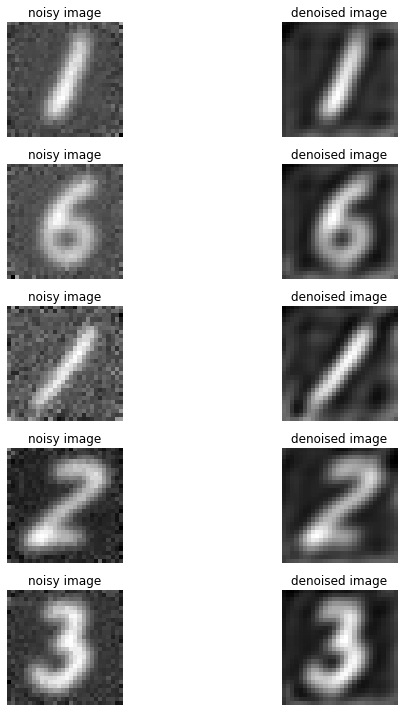

In [672]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor))
    axs[i, 0].imshow(images_test_cor[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

# M = 4

In [673]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 4


patches = []

for n in range(100):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [674]:
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=4/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [675]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [359]:
gmm_model_4 = GaussianMixture(n_components=50, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

42.35878429022716


In [360]:
gmm_model_4 = GaussianMixture(n_components=100, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

44.98101399002821


In [361]:
gmm_model_4 = GaussianMixture(n_components=150, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

45.85973048340663


In [362]:
gmm_model_4 = GaussianMixture(n_components=200, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

47.27977417186466


In [363]:
gmm_model_4 = GaussianMixture(n_components=250, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

46.60569843396699


In [364]:
gmm_model_4 = GaussianMixture(n_components=300, random_state=0).fit(patches)
acc = gmm_model_4.score(patches_val)
print(acc)

46.43795944179755


In [365]:
k = np.arange(210, 250, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_4 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_4.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

46.686772312929456
46.90588462259274
47.218302145698814
46.97493571728751
230


In [366]:
k = np.arange(160, 200, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_4 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_4.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

46.42824501147465
46.79871050991211
46.340500763678754
46.733021463548084
170


In [367]:
#بهترین مقدار کا را بر اساس اعداد قبلی 250 می شود پس یک بار مدل را با این عدد ران می کنیم
gmm_model_4 = GaussianMixture(n_components=200, random_state=0).fit(patches)

In [369]:
w_4 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=4/MNIST/W.npy")
print(w_4.shape)

(16, 16)


In [676]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=4/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [677]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 4

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [372]:
best_sigma_4 = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_4, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma_4 = sigma

print(best_sigma_4)

5


In [678]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma_4 = 50

In [679]:
images_test_cor_4 = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=4/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor_4.append(arr)
    except OSError as e:
        None

In [680]:
patches_test_cor = []

for n in range(len(images_test_cor_4)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor_4[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [681]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model_4.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [682]:
m = 4
E_Z = gmm_model_4.covariances_[best_kn]
mu_Z = gmm_model_4.means_[best_kn]
E_Y_Z = best_sigma_4*best_sigma_4*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_4.T, np.linalg.inv(E_Y_Z)),w_4))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_4.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [683]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [684]:
images_test_denoised_4 = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 4

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor_4)):
    images_test_denoised_4.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised_4[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised_4[n][i][j] = images_test_denoised_4[n][i][j]/num_of_pixels[i][j]

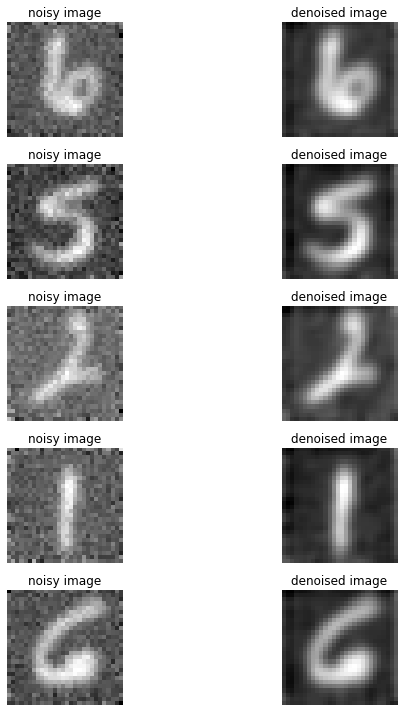

In [685]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor_4))
    axs[i, 0].imshow(images_test_cor_4[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised_4[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

# M=12

In [686]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 12


patches = []

for n in range(100):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [687]:
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=12/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [688]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [424]:
gmm_model_12 = GaussianMixture(n_components=50, random_state=0).fit(patches)
acc = gmm_model_12.score(patches_val)
print(acc)

-331.2610590926072


In [390]:
gmm_model_12 = GaussianMixture(n_components=10, random_state=0).fit(patches)
acc = gmm_model_12.score(patches_val)
print(acc)

-373.0608219352853


In [391]:
gmm_model_12 = GaussianMixture(n_components=5, random_state=0).fit(patches)
acc = gmm_model_12.score(patches_val)
print(acc)

-454.55852716898323


In [392]:
gmm_model_12 = GaussianMixture(n_components=100, random_state=0).fit(patches)
acc = gmm_model_12.score(patches_val)
print(acc)

-368.20501556222945


In [393]:
k = np.arange(20, 50, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_12 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_12.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-304.97642910771845
-274.6006598024745
-306.03803491679895
30


In [394]:
k = np.arange(60, 100, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_12 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_12.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-318.20451798923114
-358.33000772672926
-341.92122745417834
-380.50283400864424
60


In [425]:
#بهترین مقدار کا را بر اساس اعداد قبلی 30 می شود پس یک بار مدل را با این عدد ران می کنیم
gmm_model_12 = GaussianMixture(n_components=30, random_state=0).fit(patches)

In [396]:
w_12 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=12/MNIST/W.npy")
print(w_12.shape)

(144, 144)


In [689]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=12/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [690]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 12

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [428]:
best_sigma_12 = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_12, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma_12 = sigma

print(best_sigma_12)

5


In [691]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma_12 = 50

In [692]:
images_test_cor_12 = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=12/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor_12.append(arr)
    except OSError as e:
        None

In [693]:
patches_test_cor = []

for n in range(len(images_test_cor_12)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor_12[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [694]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model_12.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [695]:
m = 12
E_Z = gmm_model_12.covariances_[best_kn]
mu_Z = gmm_model_12.means_[best_kn]
E_Y_Z = best_sigma_12*best_sigma_12*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_12.T, np.linalg.inv(E_Y_Z)),w_12))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_12.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [696]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [697]:
images_test_denoised_12 = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 12

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor_12)):
    images_test_denoised_12.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised_12[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised_12[n][i][j] = images_test_denoised_12[n][i][j]/num_of_pixels[i][j]

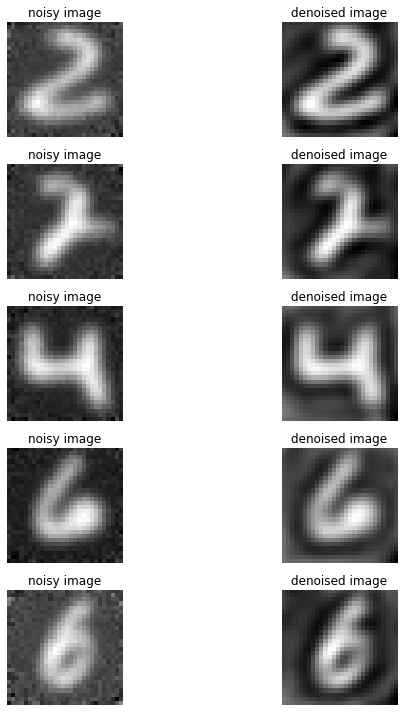

In [698]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor_12))
    axs[i, 0].imshow(images_test_cor_12[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised_12[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

# M=16

In [699]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 16


patches = []

for n in range(300):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [700]:
# تغییر اسم فولدر مربوطه به MNIST-m=16
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=16/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [701]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [445]:
k = np.arange(10, 60, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_16 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_16.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-821.817456577939
-696.0619427053692
-672.3948941354398
-643.1468799834913
-691.7199580791981
40


In [446]:
#بهترین مقدار کا را بر اساس اعداد قبلی 40 می شود پس یک بار مدل را با این عدد ران می کنیم
gmm_model_16 = GaussianMixture(n_components=40, random_state=0).fit(patches)

In [447]:
w_16 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=16/MNIST/W.npy")
print(w_16.shape)

(256, 256)


In [702]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=16/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [703]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 16

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [450]:
best_sigma_16 = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_16, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma_16 = sigma

print(best_sigma_16)

5


In [704]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma_16 = 50

In [705]:
images_test_cor_16 = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=16/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor_16.append(arr)
    except OSError as e:
        None

In [706]:
patches_test_cor = []

for n in range(len(images_test_cor_16)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor_16[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [707]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model_16.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [708]:
m = 16
E_Z = gmm_model_16.covariances_[best_kn]
mu_Z = gmm_model_16.means_[best_kn]
E_Y_Z = best_sigma_16*best_sigma_16*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_16.T, np.linalg.inv(E_Y_Z)),w_16))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_16.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [709]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [710]:
images_test_denoised_16 = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 16

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor_16)):
    images_test_denoised_16.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised_16[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised_16[n][i][j] = images_test_denoised_16[n][i][j]/num_of_pixels[i][j]

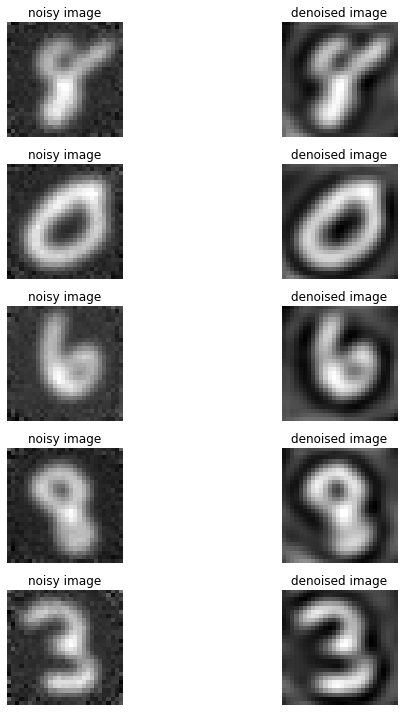

In [711]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor_16))
    axs[i, 0].imshow(images_test_cor_16[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised_16[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

# M=20

In [712]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 20


patches = []

for n in range(400):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [713]:
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=20/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [714]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [461]:
k = np.arange(10, 60, 10)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_20 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_20.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)
#بیشتر از این نیاز به ران شدن نداشت چون مقدار دقت نزولی شده بود

-1349.1046741408286
-5043.763092878157
-20056.192464393975


KeyboardInterrupt: 

In [462]:
k = np.arange(2, 10, 2)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_20 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_20.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-1754.856201849026
-1436.989761156548
-1406.766117451115
-606172.189339444
6


In [463]:
k = np.arange(12, 20, 2)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_20 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_20.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-1335.475135877055
-87732.43617204722
-1319.0531748506075
-1345.182188639612
16


In [464]:
#بهترین مقدار کا را بر اساس اعداد قبلی 16 می شود پس یک بار مدل را با این عدد ران می کنیم
gmm_model_20 = GaussianMixture(n_components=16, random_state=0).fit(patches)

In [465]:
w_20 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=20/MNIST/W.npy")
print(w_20.shape)

(400, 400)


In [715]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=20/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [716]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 20

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [468]:
best_sigma_20 = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_20, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma_20 = sigma

print(best_sigma_20)

5


In [717]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma_20 = 50

In [718]:
images_test_cor_20 = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=20/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor_20.append(arr)
    except OSError as e:
        None

In [719]:
patches_test_cor = []

for n in range(len(images_test_cor_20)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor_20[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [720]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model_20.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [721]:
m = 20
E_Z = gmm_model_20.covariances_[best_kn]
mu_Z = gmm_model_20.means_[best_kn]
E_Y_Z = best_sigma_20*best_sigma_20*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_20.T, np.linalg.inv(E_Y_Z)),w_20))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_20.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [722]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [723]:
images_test_denoised_20 = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 20

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor_20)):
    images_test_denoised_20.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised_20[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised_20[n][i][j] = images_test_denoised_20[n][i][j]/num_of_pixels[i][j]

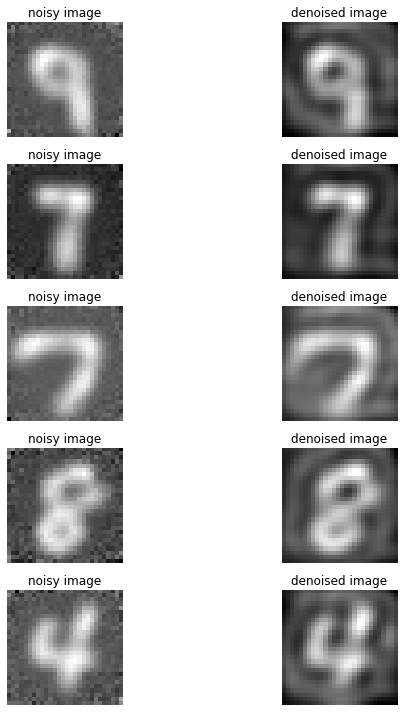

In [724]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor_20))
    axs[i, 0].imshow(images_test_cor_20[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised_20[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

# M=28

In [725]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 28


patches = []

for n in range(1000):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (train_X[n][i:i+m,j:j+m]).flatten(order='F')
            patches.append(a)

In [726]:
images_val = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=28/MNIST/original/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val.append(arr)
    except OSError as e:
        None

In [727]:
patches_val = []

for n in range(len(images_val)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val.append(a)

In [480]:
k = np.arange(1, 6, 1)
m = k.shape[0]
accuracy = []
for i in range(m):
    gmm_model_28 = GaussianMixture(n_components=k[i], random_state=0).fit(patches)
    acc = gmm_model_28.score(patches_val)
    print(acc)
    accuracy.append(acc)

mx = max(accuracy)
l=0
for i in range(m):
    if accuracy[i]==mx:
        if l==0:
            kf = k[i]
            l=1
print(kf)

-410542330.38428783
-1278735241.1457028
-9351928704.76024
-55620225532.01986
-90382150202.13159
1


In [481]:
#بهترین مقدار کا را بر اساس اعداد قبلی 1 می شود پس یک بار مدل را با این عدد ران می کنیم
gmm_model_28 = GaussianMixture(n_components=1, random_state=0).fit(patches)

In [482]:
w_28 = np.load("C:/Users/smnas/Dataset/Dataset/MNIST-m=28/MNIST/W.npy")
print(w_28.shape)

(784, 784)


In [728]:
images_val_cor = []
for i in range(300):
    filename = 'C:/Users/smnas/Dataset/Dataset/MNIST-m=28/MNIST/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_val_cor.append(arr)
    except OSError as e:
        None

In [729]:
l = train_X.shape[1]
w = train_X.shape[2]

m = 28

patches_val_cor = []

for n in range(len(images_val_cor)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_val_cor[n][i:i+m,j:j+m]).flatten(order='F')
            patches_val_cor.append(a)

In [485]:
best_sigma_28 = None
min_error = np.inf
sigmas = [5, 10, 20, 30, 50]

for sigma in sigmas:
    cross_val = []
    for i in range(len(patches_val)):
        P_patch = np.matmul(w_28, patches_val[i]) + sigma * np.random.randn(*patches_val[i].shape)
        error = mean_squared_error(patches_val_cor[i], P_patch)
        cross_val.append(error)
    avg_cross_val = np.mean(cross_val)
    if avg_cross_val < min_error:
        min_error = avg_cross_val
        best_sigma_28 = sigma

print(best_sigma_28)

5


In [730]:
#اما بر اساس نتایجی که از عکس ها می گیریم، اگر یک بار با بست سیگما 5 و یک بار هم با بست سیگما 50 کد را اجرا کنیم، مقدار 50 نتیجه بهتری می دهد
#پس ما مقدار بست سیگما را 50 می گذاریم(در نتایج صرفا با مقدار 50 ران شده است. اما با مقدار 5 هم قبل از آن تست شده و نتیجه حاصله بدتر بوده است)
best_sigma_28 = 50

In [731]:
images_test_cor_28 = []
for i in range(300):
    filename = 'C:/Users/smnas/dataset-test/MNIST-m=28/corrupted/' + str(i+1) + '.png'
    try:
        with open(filename, 'r') as file:
            img = Image.open(filename)
            arr = np.array(img)
            images_test_cor_28.append(arr)
    except OSError as e:
        None

In [732]:
patches_test_cor = []

for n in range(len(images_test_cor_28)):
    for i in range(l-m+1):
        for j in range(w-m+1):
            a = (images_test_cor_28[n][i:i+m,j:j+m]).flatten(order='F')
            patches_test_cor.append(a)

In [733]:
#پیدا کردن بزرگترین کامپوننت gmm
#best_kn
probs = gmm_model_28.predict_proba(patches_test_cor)[:, :]
means = probs.mean(axis=0)
best_kn = np.argmax(means,axis=0)

In [734]:
m = 28
E_Z = gmm_model_28.covariances_[best_kn]
mu_Z = gmm_model_28.means_[best_kn]
E_Y_Z = best_sigma_28*best_sigma_28*np.identity(m*m)
E_Z_Y = np.linalg.inv(np.linalg.inv(E_Z) + np.matmul(np.matmul(w_28.T, np.linalg.inv(E_Y_Z)),w_28))
patches_test_cor_corrected = []
for n in range(len(patches_test_cor)):
    mu_Z_Y = np.matmul(E_Z_Y,(np.matmul(np.matmul(w_28.T,np.linalg.inv(E_Y_Z)),patches_test_cor[n])+ np.matmul(np.linalg.inv(E_Z),mu_Z)))
    patches_test_cor_corrected.append(mu_Z_Y)

In [735]:
patches_matrix_test_cor_corrected = []

for n in range(len(patches_test_cor_corrected)):
    reshaped_arr = patches_test_cor_corrected[n].reshape((m, m),order='F')
    patches_matrix_test_cor_corrected.append(reshaped_arr)

In [736]:
images_test_denoised_28 = []

l = train_X.shape[1]
w = train_X.shape[2]

m = 28

num_of_patches_per_img = (l-m+1)*(w-m+1)
num_of_pixels = np.zeros([28,28])

for n in range(len(images_test_cor_28)):
    images_test_denoised_28.append(np.zeros([28,28]))
    for p in range(n*num_of_patches_per_img, (n+1)*num_of_patches_per_img):
        p_real = p % num_of_patches_per_img
        i_real = math.floor(p_real/(w-m+1))
        j_real = p_real %(l-m+1)
        for i in range(m):
            for j in range(m):
                images_test_denoised_28[n][i_real + i][j_real + j] += patches_matrix_test_cor_corrected[p][i][j]
                if(n==0):
                    num_of_pixels[i_real + i][j_real + j] += 1
    for i in range(28):
        for j in range(28):
            images_test_denoised_28[n][i][j] = images_test_denoised_28[n][i][j]/num_of_pixels[i][j]

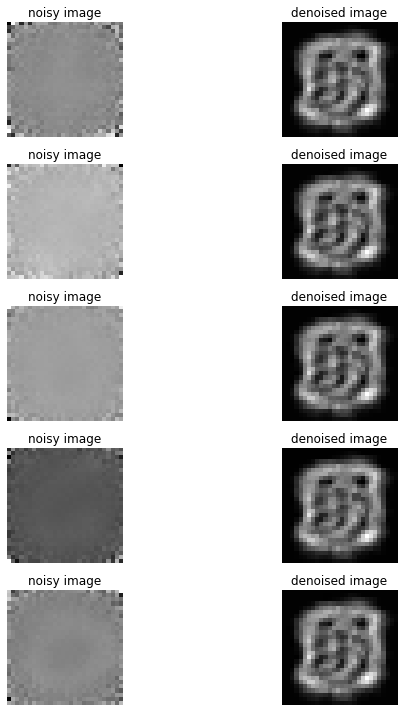

In [737]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    n1 = np.random.randint(len(images_test_cor_28))
    axs[i, 0].imshow(images_test_cor_28[n1], cmap='gray')
    axs[i, 0].set_title('noisy image')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(images_test_denoised_28[n1], cmap='gray')
    axs[i, 1].set_title('denoised image')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#به طور کلی، ما به ازای هر مقدار ام، ابتدا مقدار کا بهینه را پیدا می کردیم با استفاده از تابع اسکور. سپس بهترین مقدار سیگما را پیدا می کردیم. 
#که برای این مقادیر سیگما مقدار 50 بهترین حالت بدست آمد بر اساس عکس های ایجاد شده. سپس برای همه ام ها این کار را انجام داده و نتیجه نهایی
# را برای آنها رسم کردیم. که می توان گفت شکل های بر اساس ام برابر 8 شکل های بهتری بدست آمده اند. اما شکل های حاصل از ام های 4 و 12
# و 16 هم شکل های مناسبی هستند. که همین فرایند ها هم اگر با تعداد اولیه بیشتری عکس انجام میشد مثلا برای فیت کردن توزیع گاوسی و یا 
# هایپر پارامتر های کا و سیگما با دقت بیشتری بر اساس ران های بیشتر تعیین می شد نتیجه حاصله میتوانست از این هم بهتر شود. در نهایت باید گفت که 
# تقریب مرتبه اولی که ما برای بدست آوردن تخمین ام ای پی استفاده کردیم تا حد بسیار خوبی جواب می دهد و برای این مسئله کار می کند.